### Protein Corona

DLS Configuration

Termocycle: 10 minutes at 25ºC and 500 RPM

#### Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
df = pd.read_csv('DLS/data.txt',sep='\t',skiprows=1,decimal=',')

In [4]:
dim,std = [],[]
for i,value in enumerate(list(df['d.nm'])):

    if i>0 and i%3==0:
        mean = np.mean(values)
        std_val = np.std(values)
        dim.append(mean)
        std.append(std_val)
    
    if i % 3 == 0:
        values = []
        values.append(float(value))
    else:
        values.append(float(value))

In [5]:
prot = [0,12,24,48,72,96,120]

In [11]:
dim[2]

122.73333333333333

In [6]:
dim[-1]/dim[2]

1.0505160239000544

In [6]:
def binding_curve(P, R_max, Kd):
    return R_max * P / (Kd + P)

initial_guess = [100, 1]

popt, pcov = curve_fit(binding_curve, prot[2:],dim[2:], p0=initial_guess)
R_max, Kd = popt

print(f"Estimated R_max: {R_max}")
print(f"Estimated Kd: {Kd}")

P_fit = np.linspace(min(prot[2:]), max(prot[2:]), 100)
R_fit = binding_curve(P_fit, *popt)

Estimated R_max: 130.62813610663727
Estimated Kd: 1.59093751391865


In [7]:
def deltaG(T,Kd):
    R = 8.314 # J/mol·K
    G = R*T*np.log(Kd) # J/mol
    avogrado = 6.022e23
    J_to_eV = 1.602e-19
    G_eV = G/(avogrado*J_to_eV)
    return round(G_eV,4)

In [9]:
print('CBM:',deltaG(300,Kd),'eV')

CBM: 0.012 eV


C:\Users\pedro220068\AppData\Local\Temp\ipykernel_35312\3580765718.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--o" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(prot[:],dim[:],yerr=std[:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")


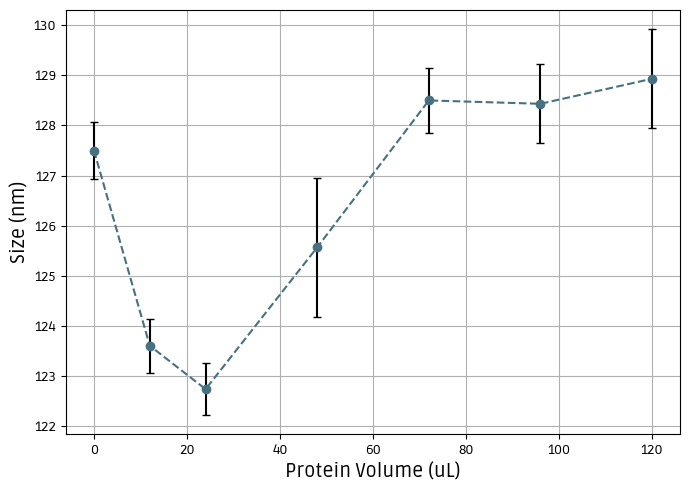

In [27]:
plt.figure(figsize=(7,5))
plt.errorbar(prot[:],dim[:],yerr=std[:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")
plt.xlabel('Protein Volume (uL)',fontsize=14),plt.ylabel('Size (nm)',fontsize=14)

plt.grid(),plt.tight_layout()
plt.legend(fontsize=12)
# plt.xlim(min(prot[1:]),max(prot[1:]))
# plt.xlim(20,125)
# plt.ylim(122,130)

# plt.savefig('results/DLS/DLS.png',transparent=True,dpi=700)
plt.show()

C:\Users\pedro220068\AppData\Local\Temp\ipykernel_24264\2749697280.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--o" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(prot[2:],dim[2:],yerr=std[2:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")


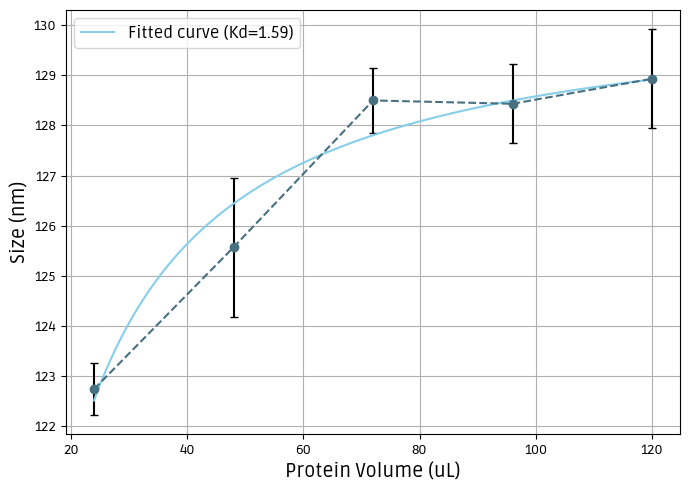

In [9]:
# plt.scatter(prot[1:],dim[1:])
plt.figure(figsize=(7,5))
plt.errorbar(prot[2:],dim[2:],yerr=std[2:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")
plt.xlabel('Protein Volume (uL)',fontsize=14),plt.ylabel('Size (nm)',fontsize=14)
plt.plot(P_fit, R_fit, label=f'Fitted curve (Kd={Kd:.2f})', color='skyblue')

plt.grid(),plt.tight_layout()
plt.legend(fontsize=12)
# plt.xlim(min(prot[1:]),max(prot[1:]))

plt.savefig('results/DLS/DLS_kd.png',transparent=True,dpi=700)
plt.show()